In [92]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from deepface import DeepFace
import pandas as pd
from datasets import load_dataset
import os

### Data

load data

In [37]:
ds = load_dataset("DeviL1337/face_recognition_52", cache_dir="E:\\Studies\\Sem-5\\DPL302m\\deepFace\\datasets\\face_recognition_52")

In [99]:
df = pd.DataFrame(ds['train'])
df

image  label
0    <PIL.JpegImagePlugin.JpegImageFile image mode=...      0
1    <PIL.JpegImagePlugin.JpegImageFile image mode=...      0
2    <PIL.JpegImagePlugin.JpegImageFile image mode=...      0
3    <PIL.JpegImagePlugin.JpegImageFile image mode=...      0
4    <PIL.JpegImagePlugin.JpegImageFile image mode=...      0
..                                                 ...    ...
501  <PIL.JpegImagePlugin.JpegImageFile image mode=...     50
502  <PIL.JpegImagePlugin.JpegImageFile image mode=...     50
503  <PIL.JpegImagePlugin.JpegImageFile image mode=...     50
504  <PIL.JpegImagePlugin.JpegImageFile image mode=...     50
505  <PIL.JpegImagePlugin.JpegImageFile image mode=...     50

[506 rows x 2 columns]

download images

In [100]:
# Create a directory to store the images
image_directory = 'downloaded_images'
os.makedirs(image_directory, exist_ok=True)

# Function to save the image and return the file path
def save_image_and_get_path(image, index):
    if image.mode != 'RGB':
        image = image.convert('RGB')  # Convert to RGB
    file_path = os.path.join(image_directory, f'image_{index}.jpg')  # Modify the file extension if needed
    image.save(file_path)  # Save the image to the specified path
    return file_path

# Add a new column for file paths
df['filepath'] = None  # Initialize the new column

# Iterate over the DataFrame and save images
for index, row in df.iterrows():
    image = row['image']
    df.at[index, 'filepath'] = save_image_and_get_path(image, index)

# Display the updated DataFrame
print(df[['label', 'filepath']].head())  # Print first few rows to verify

   label                       filepath
0      0  downloaded_images\image_0.jpg
1      0  downloaded_images\image_1.jpg
2      0  downloaded_images\image_2.jpg
3      0  downloaded_images\image_3.jpg
4      0  downloaded_images\image_4.jpg


In [85]:
# df['matrix'] = df['image'].apply(lambda x: np.array(x))

In [86]:
# df = df[df['matrix'].apply(lambda x: x.shape[0] > 400 and x.shape[1] > 400)]

In [102]:
df.head()

image  label  \
0  <PIL.JpegImagePlugin.JpegImageFile image mode=...      0   
1  <PIL.JpegImagePlugin.JpegImageFile image mode=...      0   
2  <PIL.JpegImagePlugin.JpegImageFile image mode=...      0   
3  <PIL.JpegImagePlugin.JpegImageFile image mode=...      0   
4  <PIL.JpegImagePlugin.JpegImageFile image mode=...      0   

                        filepath  
0  downloaded_images\image_0.jpg  
1  downloaded_images\image_1.jpg  
2  downloaded_images\image_2.jpg  
3  downloaded_images\image_3.jpg  
4  downloaded_images\image_4.jpg

In [103]:
df.shape

(506, 3)

make a list contain pair of images that each pair is the same person

In [104]:
# Group images by label
grouped = df.groupby('label')

# Initialize an empty list to store pairs
pairs = []

# Iterate over each label group
for label, group in grouped:
    # Ensure there are at least 2 images to form pairs
    if len(group) >= 2:
        # Create pairs by iterating over the images
        for i in range(0, len(group) - 2):
            # Check if there's a next image to form a pair
            for j in range(i + 1, len(group) - 1):
                pairs.append((group.iloc[i], group.iloc[j]))

# Display the pairs
for idx, (img1, img2) in enumerate(pairs):
    print(f"Pair {idx + 1} - Label: {img1['label']}")
    print("Image 1:", img1['image'])
    print("Image 2:", img2['image'])
    print()

Pair 1 - Label: 0
Image 1: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x960 at 0x2211A7A1B40>
Image 2: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=420x315 at 0x222B204A470>

Pair 2 - Label: 0
Image 1: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x960 at 0x2211A7A1B40>
Image 2: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x419 at 0x222B20483D0>

Pair 3 - Label: 0
Image 1: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x960 at 0x2211A7A1B40>
Image 2: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x320 at 0x222B20499F0>

Pair 4 - Label: 0
Image 1: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x960 at 0x2211A7A1B40>
Image 2: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x472 at 0x222B2049090>

Pair 5 - Label: 0
Image 1: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x960 at 0x2211A7A1B40>
Image 2: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=183x275 at 0x222B20483A0>

Pair 

### Verification

Is verified:  True


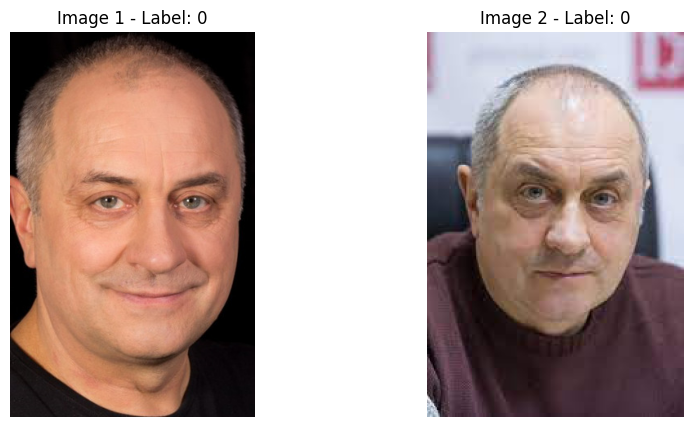

In [108]:
result = DeepFace.verify(df['filepath'][4], df['filepath'][5], model_name = "VGG-Face")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(df['image'][4])
axes[0].set_title(f"Image 1 - Label: {df['label'][4]}")
axes[0].axis("off")
axes[1].imshow(df['image'][5])
axes[1].set_title(f"Image 2 - Label: {df['label'][5]}")
axes[1].axis("off")

print("Is verified: ", result["verified"])

Is verified:  False


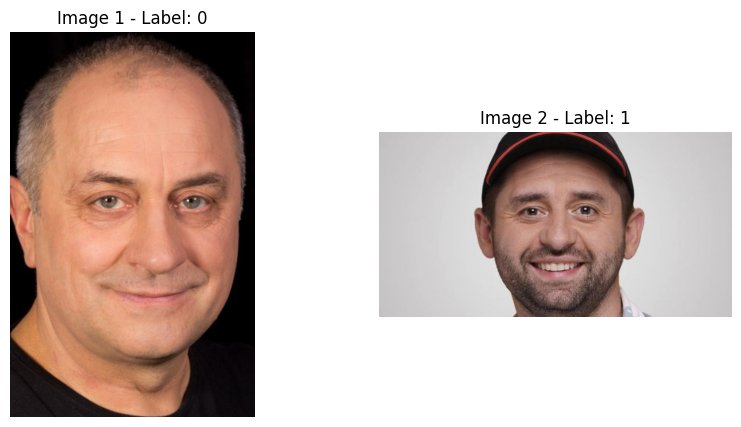

In [36]:
result = DeepFace.verify(df['matrix'][4], df['matrix'][12], model_name = "VGG-Face")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(df['image'][4])
axes[0].set_title(f"Image 1 - Label: {df['label'][4]}")
axes[0].axis("off")
axes[1].imshow(df['image'][12])
axes[1].set_title(f"Image 2 - Label: {df['label'][12]}")
axes[1].axis("off")

print("Is verified: ", result["verified"])

test on list of pair images

In [110]:
# for idx, (img1, img2) in enumerate(pairs):
#     # Perform verification on each pair
#     result = DeepFace.verify(img1['filepath'], img2['filepath'], model_name="VGG-Face")
    
#     # Create a figure with two subplots to show the pair of images
#     fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
#     # Display first image
#     axes[0].imshow(img1['image'])
#     axes[0].set_title(f"Image 1 - Label: {img1['label']}")
#     axes[0].axis("off")
    
#     # Display second image
#     axes[1].imshow(img2['image'])
#     axes[1].set_title(f"Image 2 - Label: {img2['label']}")
#     axes[1].axis("off")
    
#     # Show the plot with both images in one line
#     plt.show()

#     # Print verification result for the pair
#     print(f"Pair {idx + 1} - Is verified: {result['verified']}")

dict = {'true': 0, 'false': 0}

for idx, (img1, img2) in enumerate(pairs):
    # Perform verification on each pair
    result = DeepFace.verify(img1['filepath'], img2['filepath'], model_name="VGG-Face")

    if result['verified']:
        dict['true'] += 1
    else:
        dict['false'] += 1

print('Number of verified image is true:', dict['true'])
print('Number of verified image is false:', dict['false'])

Number of verified image is true: 1590
Number of verified image is false: 220


In [111]:
accuracy = dict['true'] / (dict['true'] + dict['false'])
print('Accuracy:', accuracy)

Accuracy: 0.8784530386740331


### Face recognition on a large scala data set

24-11-05 10:01:38 - Found 506 newly added image(s), 0 removed image(s), 0 replaced image(s).


Finding representations: 100%|██████████| 506/506 [02:09<00:00,  3.89it/s]


24-11-05 10:03:48 - There are now 541 representations in ds_model_vggface_detector_opencv_aligned_normalization_base_expand_0.pkl
24-11-05 10:03:48 - Searching downloaded_images\image_0.jpg in 541 length datastore
24-11-05 10:03:49 - find function duration 130.78359699249268 seconds


[                                             identity  \
 0   E:\Studies\Sem-5\DPL302m\deepFace\downloaded_i...   
 1   E:\Studies\Sem-5\DPL302m\deepFace\downloaded_i...   
 2   E:\Studies\Sem-5\DPL302m\deepFace\downloaded_i...   
 3   E:\Studies\Sem-5\DPL302m\deepFace\downloaded_i...   
 4   E:\Studies\Sem-5\DPL302m\deepFace\downloaded_i...   
 5   E:\Studies\Sem-5\DPL302m\deepFace\downloaded_i...   
 6   E:\Studies\Sem-5\DPL302m\deepFace\downloaded_i...   
 7   E:\Studies\Sem-5\DPL302m\deepFace\downloaded_i...   
 8   E:\Studies\Sem-5\DPL302m\deepFace\downloaded_i...   
 9   E:\Studies\Sem-5\DPL302m\deepFace\downloaded_i...   
 10  E:\Studies\Sem-5\DPL302m\deepFace\downloaded_i...   
 11  E:\Studies\Sem-5\DPL302m\deepFace\downloaded_i...   
 12  E:\Studies\Sem-5\DPL302m\deepFace\downloaded_i...   
 13  E:\Studies\Sem-5\DPL302m\deepFace\downloaded_i...   
 14  E:\Studies\Sem-5\DPL302m\deepFace\downloaded_i...   
 15  E:\Studies\Sem-5\DPL302m\deepFace\downloaded_i...   
 16  E:\Studie

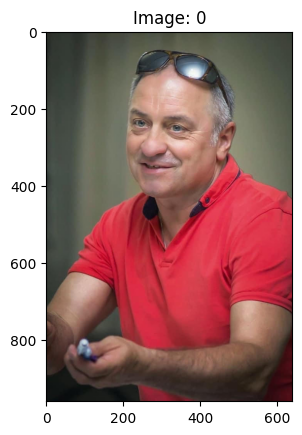

In [115]:
list = DeepFace.find(img_path=df["filepath"][0], db_path='E:\Studies\Sem-5\DPL302m\deepFace\downloaded_images', model_name='VGG-Face')

plt.figure()
plt.imshow(df['image'][0])
plt.title(f"Image: {df['label'][0]}")

list

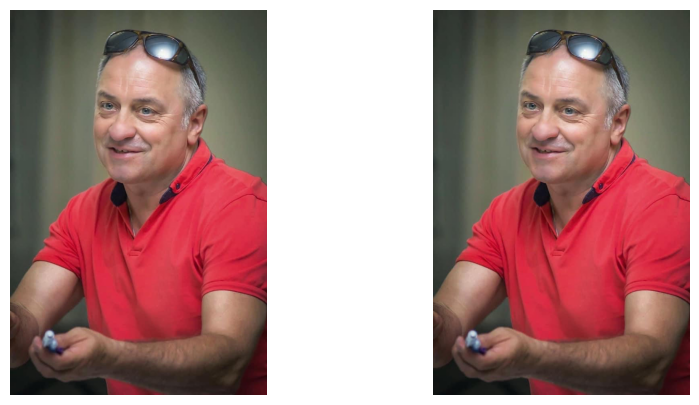

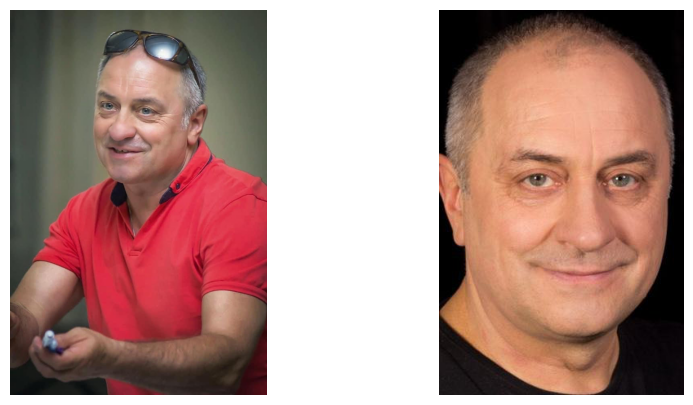

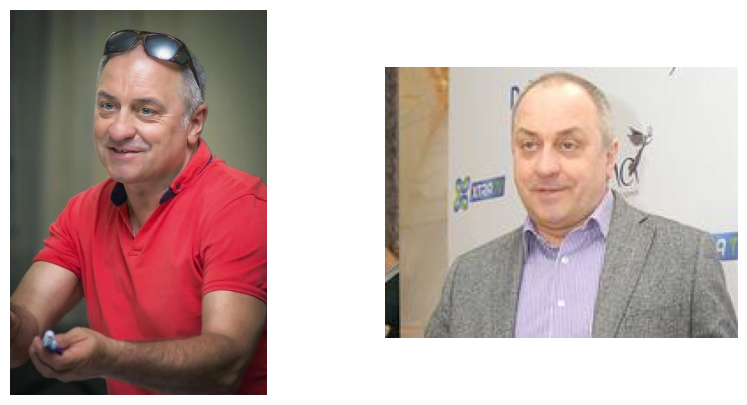

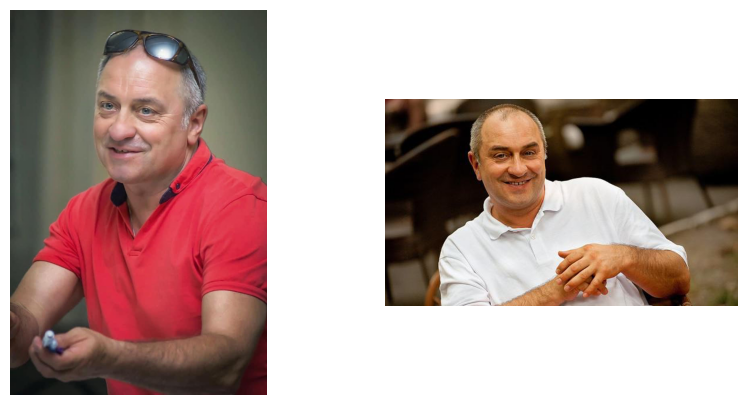

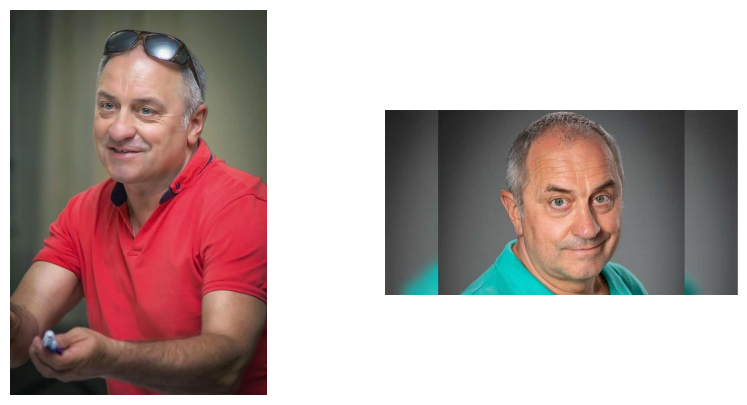

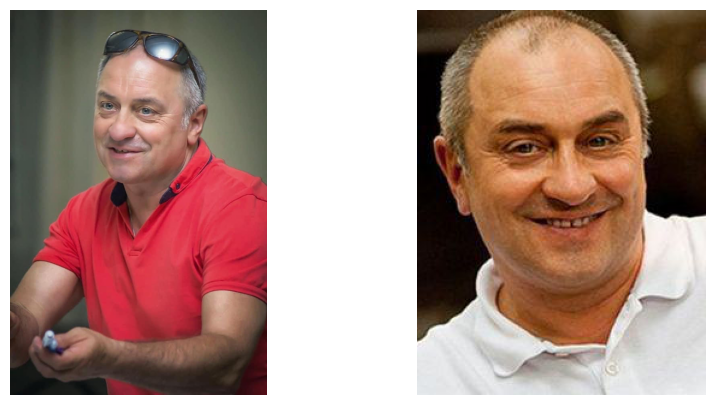

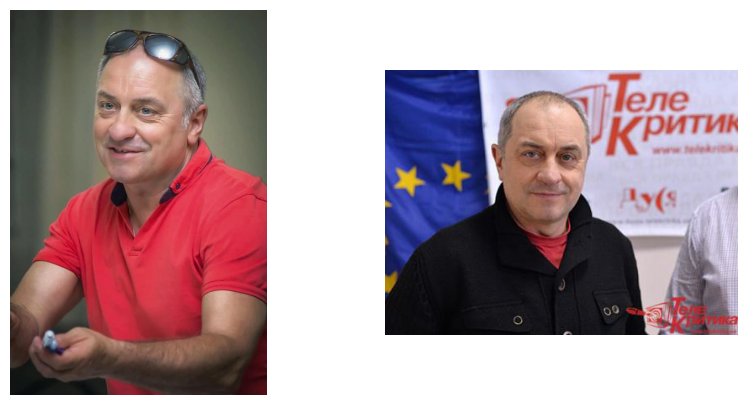

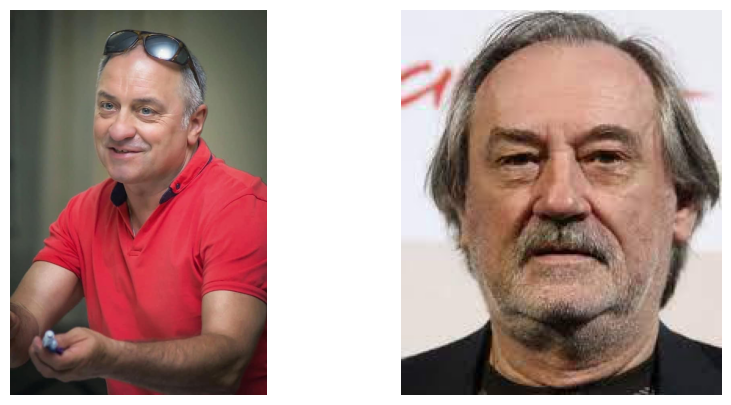

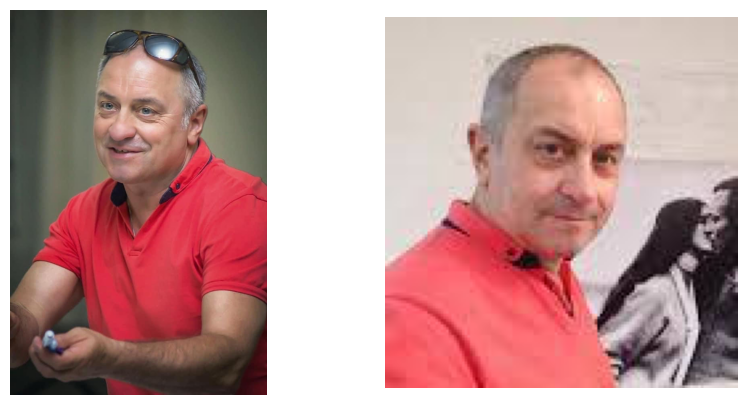

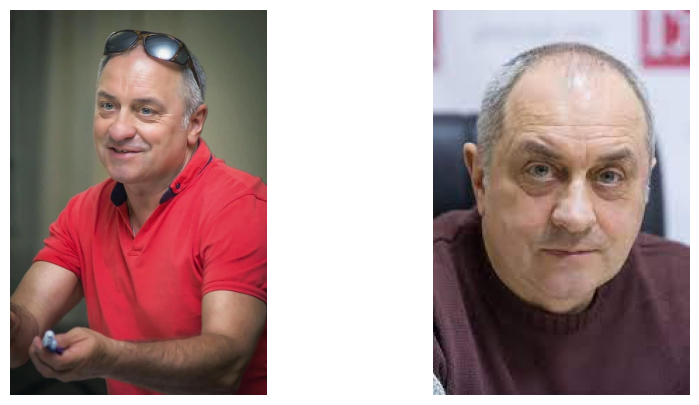

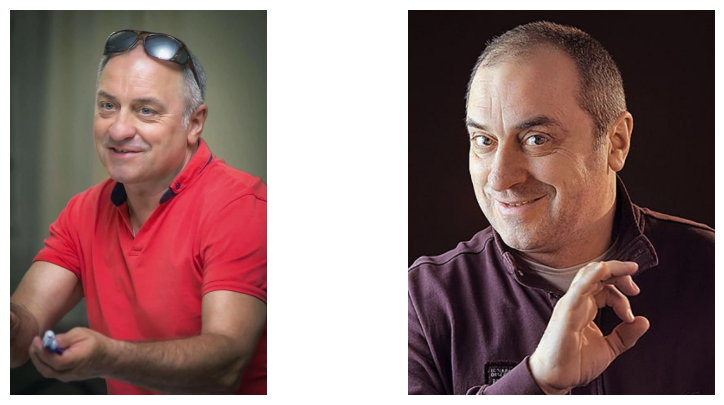

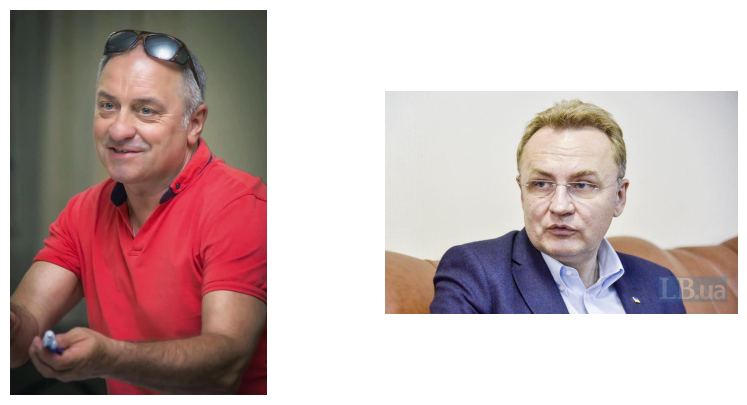

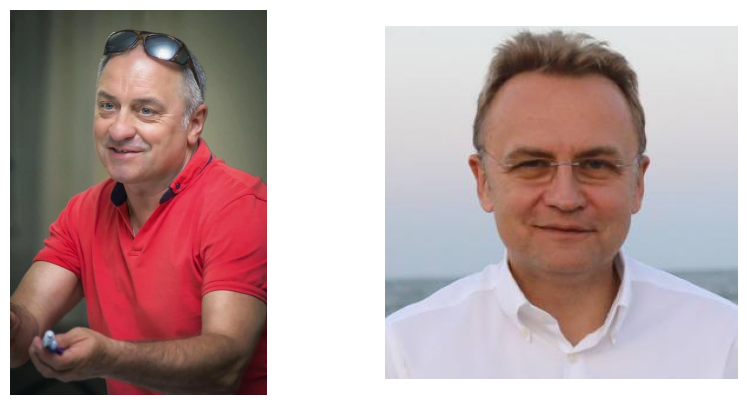

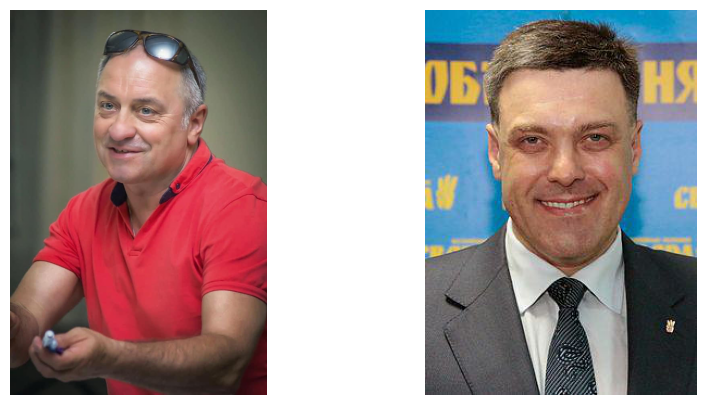

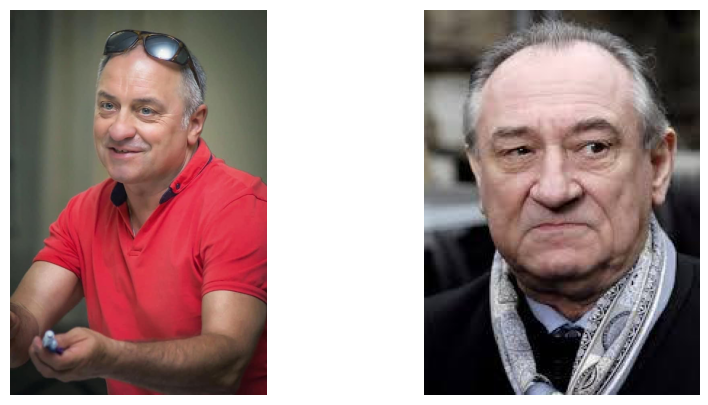

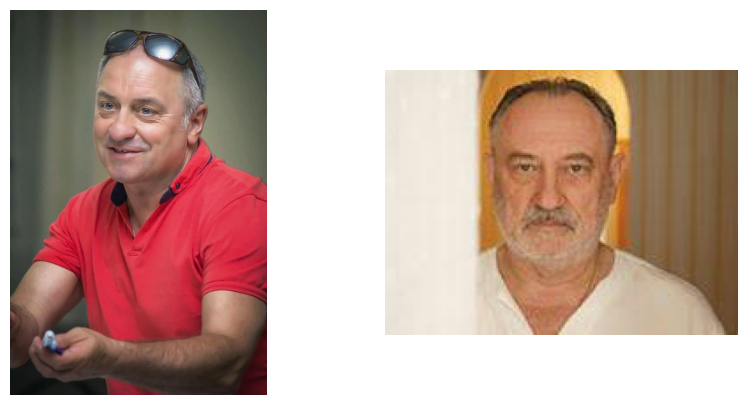

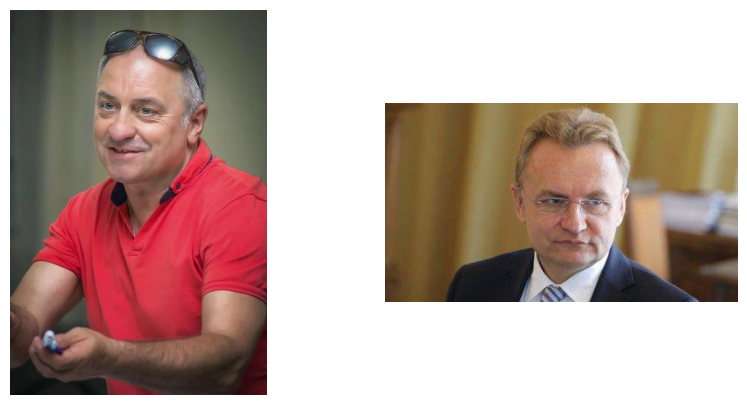

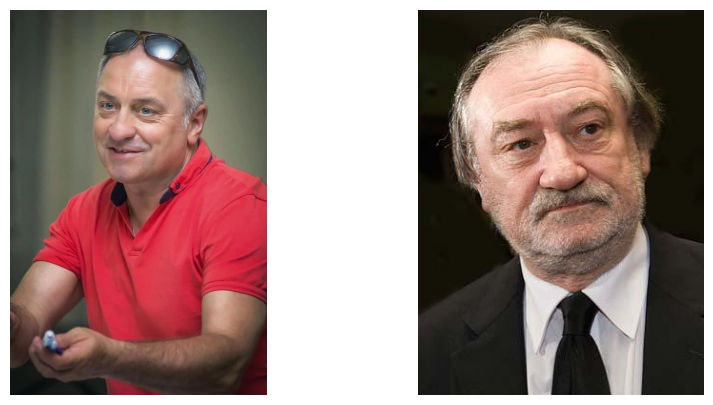

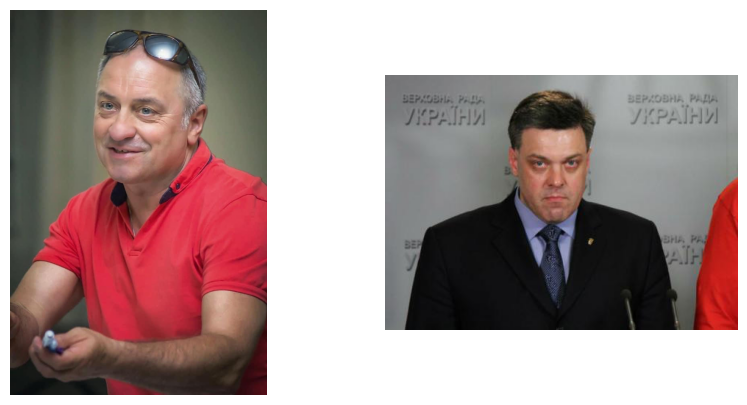

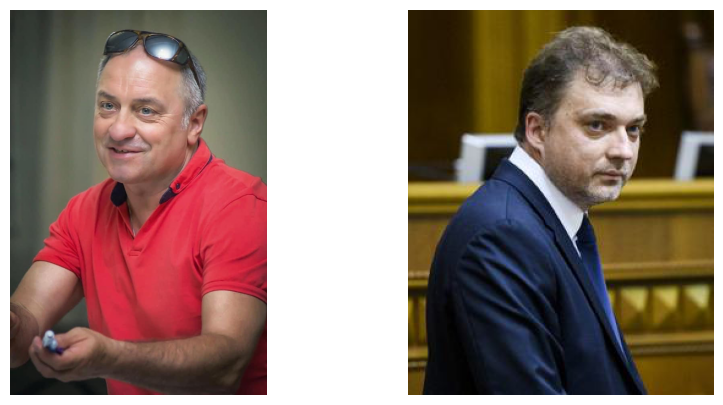

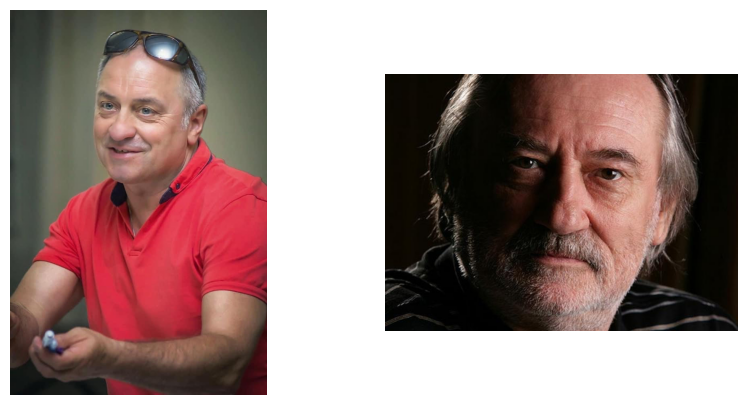

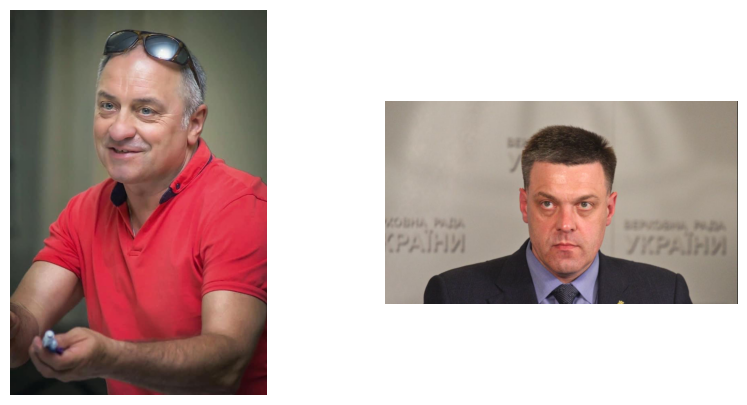

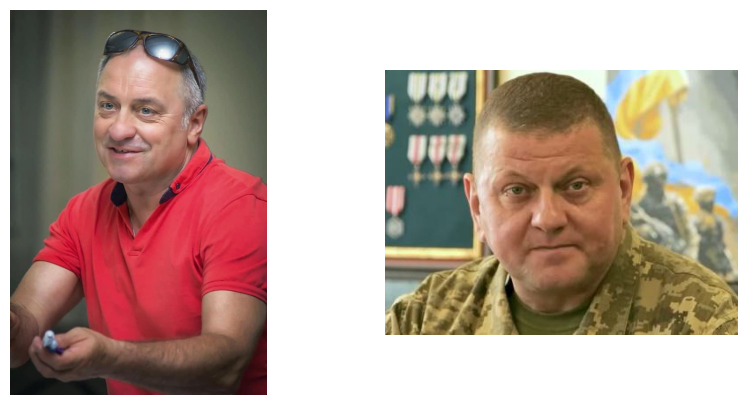

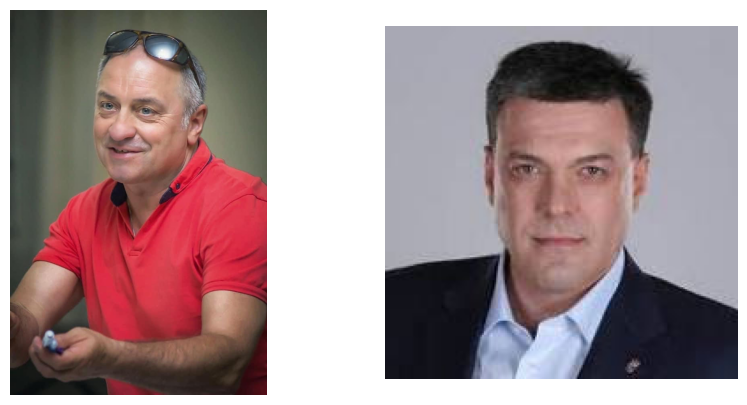

In [120]:
for filepath in list[0]['identity']:
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(df['image'][0])
    axes[0].axis("off")
    axes[1].imshow(Image.open(filepath))
    axes[1].axis("off")

### Facial Attribute Analysis

Action: race: 100%|██████████| 4/4 [00:00<00:00, 11.00it/s]  


Age:  46
Gender:  {'Woman': 0.004018905383418314, 'Man': 99.99598264694214}
Emotion:  happy
Race:  white


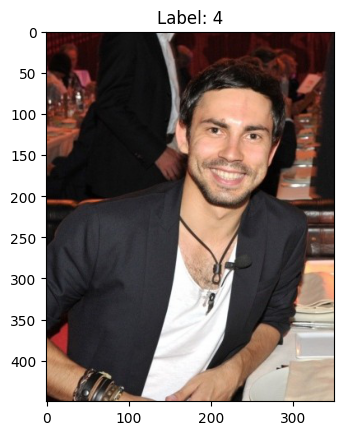

In [18]:
demography = DeepFace.analyze(df['matrix'][0])

plt.figure()
plt.imshow(df['image'][45])
plt.title(f"Label: {df['label'][45]}")

print("Age: ", demography[0]["age"])
print("Gender: ", demography[0]["gender"])
print("Emotion: ", demography[0]["dominant_emotion"])
print("Race: ", demography[0]["dominant_race"])